# Automating Crypto Website API Pull

In [80]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
#Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

In [81]:
type(data)

dict

In [82]:
import pandas as pd

#This allows you to see all the columns, not just like 15
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [83]:
#This normalizes the data and makes it all pretty in a dataframe

df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11599,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19726006.00000,19726006.00000,False,NaN,1,NaN,NaN,None,2024-07-15T16:03:00.000Z,63037.35573,30895107059.05869,42.80260,-0.45591,4.99215,12.83067,-4.93815,-4.15506,1.93708,1243475257343.77734,53.86670,1323784470319.00000,None,2024-07-15T16:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-15 18:03:55.761624
1,1027,Ethereum,ETH,ethereum,9134,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120217949.15021,120217949.15021,True,NaN,2,NaN,NaN,None,2024-07-15T16:02:00.000Z,3369.87150,14361017360.68848,42.24310,-0.31882,5.63793,13.19139,-5.41206,13.98145,11.74734,405119040220.45453,17.54350,405119040220.45001,None,2024-07-15T16:02:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-15 18:03:55.761624
2,825,Tether USDt,USDT,tether,91603,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,112536925458.19319,116072162581.85667,True,NaN,3,NaN,NaN,None,2024-07-15T16:02:00.000Z,1.00060,54043593036.26258,32.90340,0.01897,0.02311,0.08713,0.11345,0.03654,-0.01641,112604929602.17480,4.88070,116142303009.31000,None,2024-07-15T16:02:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-07-15 18:03:55.761624
3,1839,BNB,BNB,bnb,2192,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,147582208.94681,147582208.94681,False,NaN,4,NaN,NaN,None,2024-07-15T16:02:00.000Z,574.35516,1849146904.60800,25.48720,0.18263,7.11271,14.41892,-5.37026,1.15569,9.24216,84764602845.38689,3.67020,84764602845.39000,None,2024-07-15T16:02:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-15 18:03:55.761624
4,5426,Solana,SOL,solana,701,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,464071554.28831,580135746.65443,True,NaN,5,NaN,NaN,None,2024-07-15T16:02:00.000Z,153.06886,2104157820.65233,6.53290,-0.34750,4.91545,11.27597,5.47948,-4.55587,19.62674,71034902941.27249,3.07890,88800716345.48000,None,2024-07-15T16:02:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-15 18:03:55.761624
5,3408,USDC,USDC,usd-coin,20960,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,33925816346.17270,33925816346.17270,False,NaN,6,NaN,NaN,None,2024-07-15T16:02:00.000Z,1.00010,5974919116.76906,47.12690,0.00835,-0.00748,0.01184,0.00257,0.00792,-0.01621,33929072873.56536,1.46910,33929072873.57000,None,2024-07-15T16:02:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-07-15 18:03:55.761624
6,52,XRP,XRP,xrp,1352,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,55805339473.00000,99987452475.00000,False,NaN,7,NaN,NaN,None,2024-07-15T16:03:00.000Z,0.52457,1612150743.89778,-30.58250,-1.02901,-0.55439,23.52360,8.25975,1.14307,7.41049,29274025913.78145,1.26750,52457392411.25000,None,2024-07-15T16:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-15 18:03:55.761624
7,11419,Toncoin,TON,toncoin,458,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN,2506961436.28047,5109014015.98370,True,NaN,8,3414166606.00000,25395602655.84842,None,2024-07-15T16:02:00.000Z,7.43830,223792394.67531,31.53450,0.24578,1.72500,4.78197,-6.60683,10.92320,24.77784,18647536531.29543,0.80820,38002389714.98000,None,2024-07-15T16:02:00.0

In [34]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)


    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now')
    df
    #df = df.append(df2)
    #df = pd.concat([df, df2], ignore_index=True)

    # Save the data to a CSV file
    if not os.path.isfile('cryptocurrency_data.csv'):
        df.to_csv('cryptocurrency_data.csv', index=False)
    else:
        df.to_csv('cryptocurrency_data.csv', mode='a', header=False, index=False)

In [84]:
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(10) #sleep for 1 minute
exit()

API Runner completed
API Runner completed
API Runner completed
API Runner completed


KeyboardInterrupt: 

In [85]:
df72 = pd.read_csv(r'cryptocurrency_data.csv')
df72

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11599,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19725959.00000,19725959.00000,False,NaN,1,NaN,NaN,NaN,2024-07-15T14:36:00.000Z,63001.58872,29572417478.08265,38.21540,0.55794,5.41666,14.04947,-4.79902,-4.51474,1.13245,1242766756085.12402,53.94480,1323033363183.38989,NaN,2024-07-15T14:36:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-15 16:37:23.066415
1,1027,Ethereum,ETH,ethereum,9134,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120217949.15021,120217949.15021,True,NaN,2,NaN,NaN,NaN,2024-07-15T14:35:00.000Z,3362.01509,13782998675.84569,40.09770,0.66505,5.55085,15.66107,-5.30504,13.45228,10.33543,404174559307.26581,17.55910,404174559307.27002,NaN,2024-07-15T14:35:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-15 16:37:23.066415
2,825,Tether USDt,USDT,tether,91598,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'ava...",NaN,112536925458.19321,116072162581.85667,True,NaN,3,NaN,NaN,NaN,2024-07-15T14:35:00.000Z,1.00029,51972784901.13448,28.94950,0.00029,-0.01340,0.01660,0.07252,0.00393,-0.04808,112569894776.37698,4.88840,116106167598.83000,NaN,2024-07-15T14:35:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-07-15 16:37:23.066415
3,1839,BNB,BNB,bnb,2192,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,147582213.38900,147582213.38900,False,NaN,4,NaN,NaN,NaN,2024-07-15T14:35:00.000Z,570.39703,1811917448.16767,24.12170,-0.16010,6.90330,15.14172,-5.61954,-0.68316,6.75060,84180456832.11830,3.65750,84180456832.12000,NaN,2024-07-15T14:35:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-15 16:37:23.066415
4,5426,Solana,SOL,solana,701,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,464072013.81272,580136206.17884,True,NaN,5,NaN,NaN,NaN,2024-07-15T14:35:00.000Z,152.58017,2096312534.33770,10.47220,0.33577,5.87863,12.80021,5.59724,-5.40820,15.41272,70808186928.29156,3.07650,88517281172.57001,NaN,2024-07-15T14:35:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-15 16:37:23.066415
5,3408,USDC,USDC,usd-coin,20960,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,33948424091.17841,33948424091.17841,False,NaN,6,NaN,NaN,NaN,2024-07-15T14:35:00.000Z,0.99987,5794025439.17529,46.53310,-0.00135,-0.01893,0.03846,-0.02536,-0.01000,-0.05570,33944174409.32149,1.47520,33944174409.32000,NaN,2024-07-15T14:35:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-07-15 16:37:23.066415
6,52,XRP,XRP,xrp,1352,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00000,55805339473.00000,99987452475.00000,False,NaN,7,NaN,NaN,NaN,2024-07-15T14:36:00.000Z,0.52771,1602416901.66545,-37.99640,0.02653,-0.79648,24.30255,9.36869,2.48327,8.54533,29448796806.99869,1.27880,52770571929.32000,NaN,2024-07-15T14:36:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-15 16:37:23.066415
7,11419,Toncoin,TON,toncoin,458,2021-08-26T13:40:22.000Z,"['pos', 'layer-1', 'ftx-bankruptcy-estate', 'd...",NaN,2506967111.23240,5109018766.60317,True,NaN,8,3414166606.00000,25339564150.81314,NaN,2024-07-15T14:35:00.000Z,7.42189,218501999.59419,25.67100,-0.33878,1.53839,4.69812,-8.28987,11.95272,21.23835,18606430578.81636,0.80840,37918568050.12000,NaN,2024-07-15T14:35:00.000Z,NaN,NaN,

In [86]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [87]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11599,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19726006.00000,19726006.00000,False,NaN,1,NaN,NaN,None,2024-07-15T16:03:00.000Z,63037.35573,30895107059.05869,42.80260,-0.45591,4.99215,12.83067,-4.93815,-4.15506,1.93708,1243475257343.77734,53.86670,1323784470319.00000,None,2024-07-15T16:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-15 18:04:35.868301
1,1027,Ethereum,ETH,ethereum,9134,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120217949.15021,120217949.15021,True,NaN,2,NaN,NaN,None,2024-07-15T16:02:00.000Z,3369.87150,14361017360.68848,42.24310,-0.31882,5.63793,13.19139,-5.41206,13.98145,11.74734,405119040220.45453,17.54350,405119040220.45001,None,2024-07-15T16:02:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-15 18:04:35.868301
2,825,Tether USDt,USDT,tether,91603,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,112536925458.19319,116072162581.85667,True,NaN,3,NaN,NaN,None,2024-07-15T16:02:00.000Z,1.00060,54043593036.26258,32.90340,0.01897,0.02311,0.08713,0.11345,0.03654,-0.01641,112604929602.17480,4.88070,116142303009.31000,None,2024-07-15T16:02:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-07-15 18:04:35.868301
3,1839,BNB,BNB,bnb,2192,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,147582208.94681,147582208.94681,False,NaN,4,NaN,NaN,None,2024-07-15T16:02:00.000Z,574.35516,1849146904.60800,25.48720,0.18263,7.11271,14.41892,-5.37026,1.15569,9.24216,84764602845.38689,3.67020,84764602845.39000,None,2024-07-15T16:02:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-15 18:04:35.868301
4,5426,Solana,SOL,solana,701,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,464071554.28831,580135746.65443,True,NaN,5,NaN,NaN,None,2024-07-15T16:02:00.000Z,153.06886,2104157820.65233,6.53290,-0.34750,4.91545,11.27597,5.47948,-4.55587,19.62674,71034902941.27249,3.07890,88800716345.48000,None,2024-07-15T16:02:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-15 18:04:35.868301
5,3408,USDC,USDC,usd-coin,20960,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,33925816346.17270,33925816346.17270,False,NaN,6,NaN,NaN,None,2024-07-15T16:02:00.000Z,1.00010,5974919116.76906,47.12690,0.00835,-0.00748,0.01184,0.00257,0.00792,-0.01621,33929072873.56536,1.46910,33929072873.57000,None,2024-07-15T16:02:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-07-15 18:04:35.868301
6,52,XRP,XRP,xrp,1352,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,55805339473.00000,99987452475.00000,False,NaN,7,NaN,NaN,None,2024-07-15T16:03:00.000Z,0.52457,1612150743.89778,-30.58250,-1.02901,-0.55439,23.52360,8.25975,1.14307,7.41049,29274025913.78145,1.26750,52457392411.25000,None,2024-07-15T16:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-15 18:04:35.868301
7,11419,Toncoin,TON,toncoin,458,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN,2506961436.28047,5109014015.98370,True,NaN,8,3414166606.00000,25395602655.84842,None,2024-07-15T16:02:00.000Z,7.43830,223792394.67531,31.53450,0.24578,1.72500,4.78197,-6.60683,10.92320,24.77784,18647536531.29543,0.80820,38002389714.98000,None,2024-07-15T16:02:00.0

In [88]:
df3 = df.groupby('name',sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.45591,4.99215,12.83067,-4.93815,-4.15506,1.93708
Ethereum,-0.31882,5.63793,13.19139,-5.41206,13.98145,11.74734
Tether USDt,0.01897,0.02311,0.08713,0.11345,0.03654,-0.01641
BNB,0.18263,7.11271,14.41892,-5.37026,1.15569,9.24216
Solana,-0.34750,4.91545,11.27597,5.47948,-4.55587,19.62674
USDC,0.00835,-0.00748,0.01184,0.00257,0.00792,-0.01621
XRP,-1.02901,-0.55439,23.52360,8.25975,1.14307,7.41049
Toncoin,0.24578,1.72500,4.78197,-6.60683,10.92320,24.77784
Dogecoin,-0.59160,5.30100,12.36960,-13.24864,-21.65174,-19.92376


In [89]:
df4 = df3.stack()
df4

name                                     
Bitcoin      quote.USD.percent_change_1h     -0.45591
             quote.USD.percent_change_24h     4.99215
             quote.USD.percent_change_7d     12.83067
             quote.USD.percent_change_30d    -4.93815
             quote.USD.percent_change_60d    -4.15506
             quote.USD.percent_change_90d     1.93708
Ethereum     quote.USD.percent_change_1h     -0.31882
             quote.USD.percent_change_24h     5.63793
             quote.USD.percent_change_7d     13.19139
             quote.USD.percent_change_30d    -5.41206
             quote.USD.percent_change_60d    13.98145
             quote.USD.percent_change_90d    11.74734
Tether USDt  quote.USD.percent_change_1h      0.01897
             quote.USD.percent_change_24h     0.02311
             quote.USD.percent_change_7d      0.08713
             quote.USD.percent_change_30d     0.11345
             quote.USD.percent_change_60d     0.03654
             quote.USD.percent_change_90

In [90]:
type(df3)

pandas.core.frame.DataFrame

In [91]:
type(df4)

pandas.core.series.Series

In [92]:
df5 = df4.to_frame(name = 'values')
df5

values
name                                              
Bitcoin     quote.USD.percent_change_1h   -0.45591
            quote.USD.percent_change_24h   4.99215
            quote.USD.percent_change_7d   12.83067
            quote.USD.percent_change_30d  -4.93815
            quote.USD.percent_change_60d  -4.15506
            quote.USD.percent_change_90d   1.93708
Ethereum    quote.USD.percent_change_1h   -0.31882
            quote.USD.percent_change_24h   5.63793
            quote.USD.percent_change_7d   13.19139
            quote.USD.percent_change_30d  -5.41206
            quote.USD.percent_change_60d  13.98145
            quote.USD.percent_change_90d  11.74734
Tether USDt quote.USD.percent_change_1h    0.01897
            quote.USD.percent_change_24h   0.02311
            quote.USD.percent_change_7d    0.08713
            quote.USD.percent_change_30d   0.11345
            quote.USD.percent_change_60d   0.03654
            quote.USD.percent_change_90d  -0.01641
BNB         quote.USD.percent_change_1h    0.18263
            quote.USD.percent_change_24h   7.11271
            quote.USD.percent_change_7d   14.41892
            quote.USD.percent_change_30d  -5.37026
            quote.USD.percent_change_60d   1.15569
            quote.USD.percent_change_90d   9.24216
Solana      quote.USD.percent_change_1h   -0.34750
            quote.USD.percent_change_24h   4.91545
            quote.USD.percent_change_7d   11.27597
            quote.USD.percent_change_30d   5.47948
            quote.USD.percent_change_60d  -4.55587
            quote.USD.percent_change_90d  19.62674
USDC        quote.USD.percent_change_1h    0.00835
            quote.USD.percent_change_24h  -0.00748
            quote.USD.percent_change_7d    0.01184
            quote.USD.percent_change_30d   0.00257
            quote.USD.percent_change_60d   0.00792
            quote.USD.percent_change_90d  -0.01621
XRP         quote.USD.percent_change_1h   -1.02901
            quote.USD.percent_change_24h  -0.55439
            quote.USD.percent_change_7d   23.52360
            quote.USD.percent_change_30d   8.25975
            quote.USD.percent_change_60d   1.14307
            quote.USD.percent_change_90d   7.41049
Toncoin     quote.USD.percent_change_1h    0.24578
            quote.USD.percent_change_24h   1.72500
            quote.USD.percent_change_7d    4.78197
            quote.USD.percent_change_30d  -6.60683
            quote.USD.percent_change_60d  10.92320
            quote.USD.percent_change_90d  24.77784
Dogecoin    quote.USD.percent_change_1h   -0.59160
            quote.USD.percent_change_24h   5.30100
            quote.USD.percent_change_7d   12.36960
            quote.USD.percent_change_30d -13.24864
            quote.USD.percent_change_60d -21.65174
            quote.USD.percent_change_90d -19.92376
Cardano     quote.USD.percent_change_1h   -1.58013
            quote.USD.percent_change_24h   1.22993
            quote.USD.percent_change_7d   20.46089
            quote.USD.percent_change_30d   5.76006
            quote.USD.percent_change_60d  -4.41789
            quote.USD.percent_change_90d  -1.76781
TRON        quote.USD.percent_change_1h   -0.13523
            quote.USD.percent_change_24h   0.24700
            quote.USD.percent_change_7d   10.56321
            quote.USD.percent_change_30d  20.13838
            quote.USD.percent_change_60d  10.09776
            quote.USD.percent_change_90d  26.28928
Avalanche   quote.USD.percent_change_1h   -0.94683
            quote.USD.percent_change_24h   3.96597
            quote.USD.percent_change_7d    3.98943
            quote.USD.percent_change_30d -11.04509
            quote.USD.percent_change_60d -21.24595
            quote.USD.percent_change_90d -18.30781
Shiba Inu   quote.USD.percent_change_1h   -0.28513
            quote.USD.percent_change_24h   4.17761
            quote.USD.percent_change_7d   13.25074
            quote.USD.percent_change_30d -13.67087
            quote.USD.percent_change_60d -26.65711
            quo

In [93]:
type(df5)

pandas.core.frame.DataFrame

In [94]:
df5.count()

values    90
dtype: int64

In [125]:
index = pd.Index(range(90))

#df6 = df5.set_index(index)
df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.45591
1,Bitcoin,quote.USD.percent_change_24h,4.99215
2,Bitcoin,quote.USD.percent_change_7d,12.83067
3,Bitcoin,quote.USD.percent_change_30d,-4.93815
4,Bitcoin,quote.USD.percent_change_60d,-4.15506
5,Bitcoin,quote.USD.percent_change_90d,1.93708
6,Ethereum,quote.USD.percent_change_1h,-0.31882
7,Ethereum,quote.USD.percent_change_24h,5.63793
8,Ethereum,quote.USD.percent_change_7d,13.19139
9,Ethereum,quote.USD.percent_change_30d,-5.41206


In [126]:
df7 = df6.rename(columns = {'level_1':'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.45591
1,Bitcoin,quote.USD.percent_change_24h,4.99215
2,Bitcoin,quote.USD.percent_change_7d,12.83067
3,Bitcoin,quote.USD.percent_change_30d,-4.93815
4,Bitcoin,quote.USD.percent_change_60d,-4.15506
5,Bitcoin,quote.USD.percent_change_90d,1.93708
6,Ethereum,quote.USD.percent_change_1h,-0.31882
7,Ethereum,quote.USD.percent_change_24h,5.63793
8,Ethereum,quote.USD.percent_change_7d,13.19139
9,Ethereum,quote.USD.percent_change_30d,-5.41206


In [127]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,-0.45591
1,Bitcoin,24h,4.99215
2,Bitcoin,7d,12.83067
3,Bitcoin,30d,-4.93815
4,Bitcoin,60d,-4.15506
5,Bitcoin,90d,1.93708
6,Ethereum,1h,-0.31882
7,Ethereum,24h,5.63793
8,Ethereum,7d,13.19139
9,Ethereum,30d,-5.41206


In [128]:
import seaborn as sns
import matplotlib.pyplot as plt

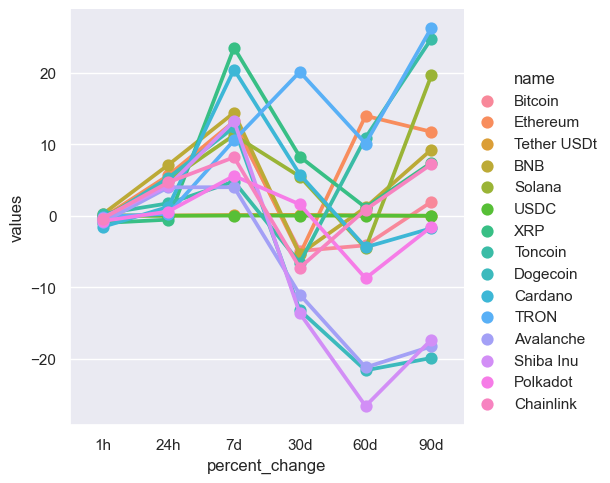

In [129]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [130]:
df10 = df[['name', 'quote.USD.price', 'timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,timestamp
0,Bitcoin,63037.35573,2024-07-15 18:04:35.868301


C:\Users\UserX\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\UserX\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

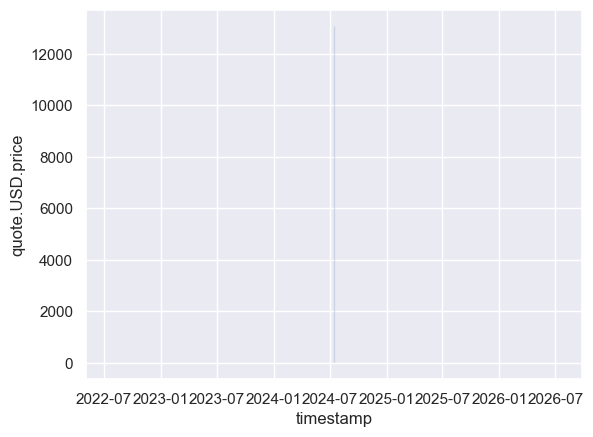

In [131]:
sns.set_theme(style="darkgrid")
sns.lineplot(x='timestamp', y='quote.USD.price', data=df)